In [3]:
import umap
import matplotlib.pyplot as plt
from dataloader import GeneticDataloaders, SynGeneticDataset
from torch.utils.data import DataLoader
from config import *
import numpy as np
import sklearn
num_samples = 200






/home/philipkenneweg/miniconda3/envs/sls3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-10 14:36:39.860827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def draw_samples(dataloader,num_samples):
    data = []
    data_labels = []
    for i, (x, y) in enumerate(dataloader):
        for d in x:
            data.append(d)
        for l in y:
            data_labels.append(l)
        if len(data) >= num_samples:
            break

    data = torch.stack(data)
    data_labels = torch.stack(data_labels)

    out_label = np.argmax(data_labels.numpy(), axis = 1) if len(data_labels.shape) > 1 else data_labels.numpy()
    return data.numpy()[:num_samples], out_label[:num_samples]

In [5]:



datas = []

geneticData = SynGeneticDataset("finalruns/Transformer/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

geneticData = SynGeneticDataset("finalruns/UnetMLP/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

geneticData = SynGeneticDataset("finalruns/Unet/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

geneticData = SynGeneticDataset("finalruns/Baseline/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

geneticData = SynGeneticDataset("finalruns/UnetCombined/")
syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
datas.append(syn_data)

# geneticData = SynGeneticDataset("newgeneration/")
# syn_dataloader = DataLoader(geneticData, batch_size=config["batch_size"])
# syn_data, syn_data_labels = draw_samples(syn_dataloader, num_samples)
# datas.append(syn_data)

train_dataloader,test_dataloader = GeneticDataloaders(config["batch_size"], True) 
syn_data, syn_data_labels = draw_samples(test_dataloader, num_samples)
datas.append(syn_data)
syn_data, syn_data_labels = draw_samples(train_dataloader, num_samples)
datas.append(syn_data)






path of dataset finalruns/Transformer/
len of syn dataset 10400
path of dataset finalruns/UnetMLP/
len of syn dataset 10400
path of dataset finalruns/Unet/
len of syn dataset 10400
path of dataset finalruns/Baseline/
len of syn dataset 10400
path of dataset finalruns/UnetCombined/
len of syn dataset 10400
len of dataset 9365
len of dataset 1040


In [6]:

combined_data = np.concatenate(datas, axis=0)
combined_data = combined_data.reshape(combined_data.shape[0], -1)
print(combined_data.shape)


combined_labels = np.concatenate([np.zeros(len(datas[i]))+i for i in range(len(datas))])



(1400, 147456)


In [7]:
print("computing UMAP")
reducer = umap.UMAP(metric = 'cosine', n_neighbors=5)
embedding = reducer.fit_transform(combined_data)

computing UMAP


KeyboardInterrupt: 

In [ ]:
print("computing UMAP")
reducer = umap.UMAP(metric = 'cosine', n_neighbors=15)
embedding2 = reducer.fit_transform(combined_data)

computing UMAP


In [ ]:
print("computing UMAP")
reducer = umap.UMAP(metric = 'euclidean', n_neighbors=15)
embedding3 = reducer.fit_transform(combined_data)

computing UMAP


In [ ]:
print("computing UMAP")
reducer = umap.UMAP(metric = 'euclidean', n_neighbors=5)
embedding4 = reducer.fit_transform(combined_data)

computing UMAP


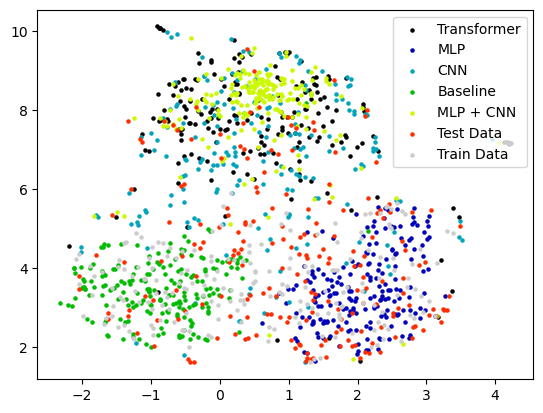

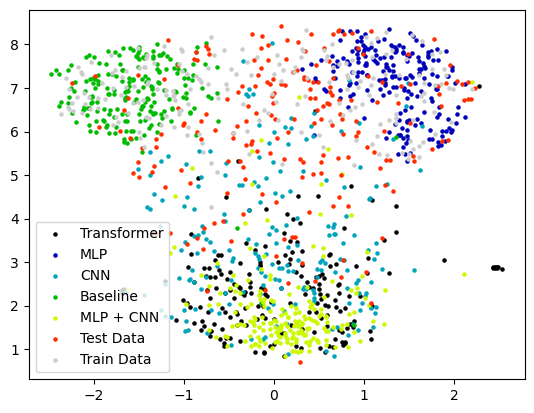

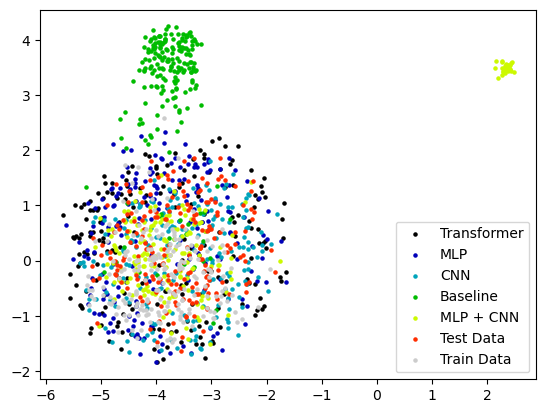

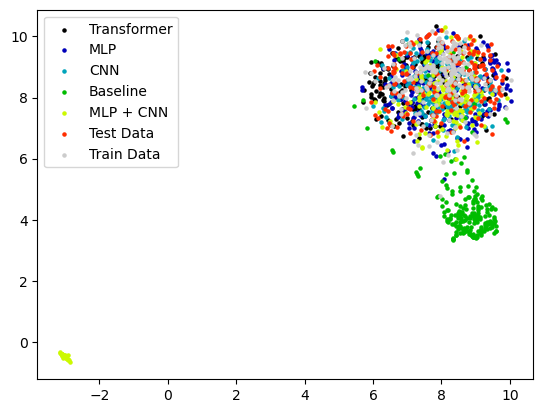

In [ ]:

colors = plt.get_cmap('nipy_spectral')(np.linspace(0, 1, len(datas)))
labels =  ["Transformer", "MLP", "CNN", "Baseline", "MLP + CNN" ,"Test Data", "Train Data"]
for i in range(len(datas)):
    plt_data = embedding[i*num_samples: (i+1)*num_samples]
    plt.scatter(plt_data[:, 0], plt_data[:, 1], color = colors[i], label = labels[i], s = 5)
plt.legend()
plt.show()

for i in range(len(datas)):
    plt_data = embedding2[i*num_samples: (i+1)*num_samples]
    plt.scatter(plt_data[:, 0], plt_data[:, 1], color = colors[i], label = labels[i], s = 5)
plt.legend()
plt.show()

for i in range(len(datas)):
    plt_data = embedding3[i*num_samples: (i+1)*num_samples]
    plt.scatter(plt_data[:, 0], plt_data[:, 1], color = colors[i], label = labels[i], s = 5)
plt.legend()
plt.show()

for i in range(len(datas)):
    plt_data = embedding4[i*num_samples: (i+1)*num_samples]
    plt.scatter(plt_data[:, 0], plt_data[:, 1], color = colors[i], label = labels[i], s = 5)
plt.legend()
plt.show()


In [8]:
num_checks = 200
def distance(x1, x2):
    x1 = x1.flatten()
    x2 = x2.flatten()
    return np.arccos(np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))/np.pi
    return np.mean((x1-x2)**2)

def check_diversity_by_closest(data1, data2):

    def find_closest(dataset1, dataset2, num = num_checks):
        all_min_dist = []
        for i,datapoint in enumerate(dataset1):
            if i > num:
                break
            #find closest sample in geneticData
            min_dist = 1e50
            for sample2 in dataset2:
                dist = distance(datapoint, sample2)
                #dist = torch.arccos(torch.nn.functional.cosine_similarity(sample,sample2.flatten(), dim = 0)) / np.pi
                if dist < min_dist and dist > 1e-3:
                    min_dist = dist
            all_min_dist.append(min_dist)
           # print(min_dist)
        
        return all_min_dist

    AA_ts = find_closest(data1, data2)
    AA_st = find_closest(data2, data1)
    AA_tt  = find_closest(data1, data1)
    AA_ss = find_closest(data2, data2)

    AA_truth = 0
    AA_syn = 0
    for i in range(num_checks):
        AA_truth += 1 if AA_ts[i]>AA_tt[i] else 0
        AA_syn += 1 if AA_st[i]>AA_ss[i] else 0
      #  print(AA_ts[i], AA_st[i], AA_tt[i], AA_ss[i])
    
    print(f"AA_truth: {AA_truth/num_checks}, AA_syn: {AA_syn/num_checks} average {(AA_truth/num_checks + AA_syn/num_checks) /2}")





In [9]:
from tqdm import tqdm

def distance(x1, x2):
    x1 = x1.flatten()
    x2 = x2.flatten()
    return np.arccos(np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))/np.pi
    return 1-np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))
    return np.mean((x1-x2)**2)
  #  return np.mean(np.abs(x1-x2))
def compute_closest(data1,data2, topn = 10):
    closest_neighborss = []
    for p1 in tqdm(data1):
        dists = []
        closest_neighbors = []
        for p2 in data2:
            dist = distance(p1, p2)
            closest_neighbors.append(0)
            dists.append(dist)
      #  print(min_dist)
        for p1_1 in data1:
            dist = distance(p1, p1_1)
            if dist < 1e-4:
                continue
            closest_neighbors.append(1)
            dists.append(dist)
            # if dist < min_dist and dist > 1e-4:
            #     closest_neighbor = 1
            #     min_dist = dist
        

      #  print(min_dist, closest_neighbor)
        indx = np.argsort(np.array(dists))
        closest_neighbors = np.array(closest_neighbors)
        closest_neighbor = closest_neighbors[indx[:topn]]
       # print(closest_neighbor)

        closest_neighborss.append(np.mean(closest_neighbor))
       # print(closest_neighborss)
    closest_neighborss = np.array(closest_neighborss)
    avg_class = np.mean(closest_neighborss)
    return avg_class


print("Checking diversity for test and train")
print(compute_closest(datas[5], datas[6]))
print("Checking diversity for test and transformer")
print(compute_closest(datas[5], datas[0]))
print("Checking diversity for test and mlp")
print(compute_closest(datas[5], datas[1]))
print("Checking diversity for test and cnn")
print(compute_closest(datas[5], datas[2]))
print("Checking diversity for test and baseline")
print(compute_closest(datas[5], datas[3]))
print("Checking diversity for test and mlp+cnn")
print(compute_closest(datas[5], datas[4]))

print("Checking diversity for mlp and test")
print(compute_closest(datas[1], datas[5]))
print("Checking diversity for transformer and test")
print(compute_closest(datas[0], datas[5]))
print("Checking diversity for cnn and test")
print(compute_closest(datas[2], datas[5]))
print("Checking diversity for baseline and test")
print(compute_closest(datas[3], datas[5]))
print("Checking diversity for mlp+cnn and test")
print(compute_closest(datas[4], datas[5]))
print("Checking diversity for train and test")
print(compute_closest(datas[6], datas[5]))


Checking diversity for test and train


  3%|▎         | 6/200 [00:00<00:13, 14.33it/s]/tmp/ipykernel_20041/283690598.py:6: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))/np.pi
 36%|███▌      | 71/200 [00:04<00:08, 14.88it/s]


KeyboardInterrupt: 

In [ ]:

print("Checking diversity for train and transformer")
print(compute_closest(datas[6], datas[0]))
print("Checking diversity for train and mlp")
print(compute_closest(datas[6], datas[1]))
print("Checking diversity for train and cnn")
print(compute_closest(datas[6], datas[2]))
print("Checking diversity for train and baseline")
print(compute_closest(datas[6], datas[3]))
print("Checking diversity for train and mlp+cnn")
print(compute_closest(datas[6], datas[4]))

print("Checking diversity for mlp and train")
print(compute_closest(datas[1], datas[6]))
print("Checking diversity for transformer and train")
print(compute_closest(datas[0], datas[6]))
print("Checking diversity for cnn and train")
print(compute_closest(datas[2], datas[6]))
print("Checking diversity for baseline and train")
print(compute_closest(datas[3], datas[6]))
print("Checking diversity for mlp+cnn and train")
print(compute_closest(datas[4], datas[6]))

Checking diversity for train and transformer


100%|██████████| 200/200 [00:12<00:00, 15.49it/s]


0.7935000000000001
Checking diversity for train and mlp


100%|██████████| 200/200 [00:12<00:00, 15.53it/s]


0.0165
Checking diversity for train and cnn


100%|██████████| 200/200 [00:12<00:00, 15.44it/s]


0.7835
Checking diversity for train and baseline


100%|██████████| 200/200 [00:13<00:00, 15.36it/s]


0.026500000000000003
Checking diversity for train and mlp+cnn


100%|██████████| 200/200 [00:12<00:00, 15.75it/s]


0.40399999999999997
Checking diversity for mlp and train


100%|██████████| 200/200 [00:12<00:00, 15.48it/s]


0.9969999999999999
Checking diversity for transformer and train


100%|██████████| 200/200 [00:12<00:00, 15.66it/s]


0.6405
Checking diversity for cnn and train


100%|██████████| 200/200 [00:12<00:00, 15.45it/s]


0.532
Checking diversity for baseline and train


100%|██████████| 200/200 [00:12<00:00, 15.40it/s]


0.9785
Checking diversity for mlp+cnn and train


100%|██████████| 200/200 [00:12<00:00, 15.55it/s]

0.9590000000000001


In [10]:
print("nnaa for dataset test and transformer")
check_diversity_by_closest(datas[-2], datas[0])

print("nnaa for dataset test and mlp")
check_diversity_by_closest(datas[-2], datas[1])
print("nnaa for dataset test and cnn")
check_diversity_by_closest(datas[-2], datas[2])
print("nnaa for dataset test and baseline")
check_diversity_by_closest(datas[-2], datas[3])
print("nnaa for dataset test and mlp+cnn")
check_diversity_by_closest(datas[-2], datas[4])
print("nnaa for dataset test and train")
check_diversity_by_closest(datas[-2], datas[-1])

nnaa for dataset test and transformer


/tmp/ipykernel_20041/283690598.py:6: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))/np.pi


AA_truth: 0.915, AA_syn: 0.65 average 0.7825
nnaa for dataset test and mlp
AA_truth: 0.225, AA_syn: 1.0 average 0.6125
nnaa for dataset test and cnn
AA_truth: 0.755, AA_syn: 0.62 average 0.6875
nnaa for dataset test and baseline
AA_truth: 0.35, AA_syn: 0.995 average 0.6725
nnaa for dataset test and mlp+cnn
AA_truth: 0.415, AA_syn: 0.925 average 0.67
nnaa for dataset test and train
AA_truth: 0.53, AA_syn: 0.545 average 0.5375000000000001
